<a href="https://colab.research.google.com/github/bburt26/Final-Project/blob/main/milestone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone in Fork

In [2]:
! git clone https://github.com/bburt26/Final-Project.git

Cloning into 'Final-Project'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 150 (delta 64), reused 43 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (150/150), 1.92 MiB | 4.39 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
#!git config --global user.name "bburt26"
#!git config --global user.email "jtg3ts@virginia.edu"

In [11]:
#%cd Final-Project

/content/Final-Project


In [ ]:
#! git push origin main

fatal: could not read Username for 'https://github.com': No such device or address


# AI Acknowledgement

I acknowledge that I have used AI to the extent permitted by the UVA AI acceptable use policy. I am aware of the possibility of AI producing errors and offensive content and certify that I have taken the necessary measures to ensure that the work produced is both accurate and ethical to the best of my ability.

# Cleaning and Wrangling

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/Final-Project/data/CVD Dataset.csv')

### --- Cleaning --- ###
columns_of_interest = ['Sex',	'Age',	'Weight (kg)',	'Height (m)',
                       'BMI',	'Total Cholesterol (mg/dL)',
                       'Fasting Blood Sugar (mg/dL)',
                       'Smoking Status',	'Diabetes Status',
                       'Physical Activity Level'	,
                       'Family History of CVD',	'CVD Risk Level',
                       'Systolic BP',	'Diastolic BP',	'Blood Pressure Category',
                      'CVD Risk Score'
                       ]
data_cleaned = data[columns_of_interest].copy()

# Replace Nulls with Mean
missing_numerical_cols = [
    'Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Total Cholesterol (mg/dL)',
    'Fasting Blood Sugar (mg/dL)', 'Systolic BP', 'Diastolic BP', 'CVD Risk Score'
]
# Did not do this for categorical variables. That would arbitrarily skew data since
# the categories are often binary (eg. Sex would become 0 or 1 -- not enough of a
# range for mean replacement to be meaningful).

for col in missing_numerical_cols:
    if col in data_cleaned.columns:
        data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mean())


# Save cleaned dataframe to CSV
data_cleaned.to_csv('CVD_Cleaned.csv', index=False)


### --- Encoding Categorical Data --- ###
# Encode Sex as numeric
data_cleaned['Sex'] = data_cleaned['Sex'].map({'F': 0, 'M': 1})

# Encode BP Category as numeric
bp_map = {
    'Normal': 0,
    'Elevated': 1,
    'Hypertension Stage 1': 2,
    'Hypertension Stage 2': 3
}
data_cleaned['BP_Category_Label'] = data_cleaned['Blood Pressure Category'].map(bp_map)

# Encode Smoking Status
smoking_map = {'N': 0, 'Y': 1}
data_cleaned['Smoking_Status_Encoded'] = data_cleaned['Smoking Status'].map(smoking_map)

# Encode diabetes status
diabetes_map = {'N': 0, 'Y': 1}
data_cleaned['Diabetes_Status_Encoded'] = data_cleaned['Diabetes Status'].map(diabetes_map)

# Encode Physical Activity Level
physical_activity_map = {'Low': 0, 'Moderate': 1, 'High': 2}
data_cleaned['Physical_Activity_Level_Encoded'] = data_cleaned['Physical Activity Level'].map(physical_activity_map)

# Encode Family History of CVD
family_history_map = {'N': 0, 'Y': 1}
data_cleaned['Family_History_CVD_Encoded'] = data_cleaned['Family History of CVD'].map(family_history_map)

# Encode CVD Risk Level
cvd_risk_map = {'LOW': 0, 'INTERMEDIARY': 1, 'HIGH': 2}
data_cleaned['CVD_Risk_Level_Encoded'] = data_cleaned['CVD Risk Level'].map(cvd_risk_map)

print("Data types after encoding new columns:")
print(data_cleaned[['Smoking_Status_Encoded', 'Diabetes_Status_Encoded',
                    'Physical_Activity_Level_Encoded', 'Family_History_CVD_Encoded',
                    'CVD_Risk_Level_Encoded']].dtypes)

print("\nFirst 5 rows with new encoded columns:")
display(data_cleaned.head())

# Remove columns with encoded versions
columns_to_drop = [
    'Smoking Status',
    'Diabetes Status',
    'Physical Activity Level',
    'Family History of CVD',
    'CVD Risk Level',
    'Blood Pressure Category'
]

data_cleaned = data_cleaned.drop(columns=columns_to_drop)

# View
print("DataFrame after dropping original categorical columns:")
display(data_cleaned.head())
print("\nUpdated DataFrame Info:")
data_cleaned.info()

print("Missing values after imputation:")
print(data_cleaned[missing_numerical_cols].isnull().sum())
print("\nUpdated DataFrame Info:")
data_cleaned.info()


### ---- Save as modeling data --- ###
model_data = data_cleaned.copy()
model_data.head(10)


Data types after encoding new columns:
Smoking_Status_Encoded             int64
Diabetes_Status_Encoded            int64
Physical_Activity_Level_Encoded    int64
Family_History_CVD_Encoded         int64
CVD_Risk_Level_Encoded             int64
dtype: object

First 5 rows with new encoded columns:


,Sex,Age,Weight (kg),Height (m),BMI,Total Cholesterol (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,...,Systolic BP,Diastolic BP,Blood Pressure Category,CVD Risk Score,BP_Category_Label,Smoking_Status_Encoded,Diabetes_Status_Encoded,Physical_Activity_Level_Encoded,Family_History_CVD_Encoded,CVD_Risk_Level_Encoded
0,0,32.0000,69.100000,1.71,23.6,248.0,111.0,N,Y,Low,...,125.0,79.0,Elevated,17.93,1,0,1,0,0,1
1,0,55.0000,118.700000,1.69,41.6,162.0,135.0,Y,Y,High,...,139.0,70.0,Hypertension Stage 1,20.51,2,1,1,2,1,2
2,1,47.0255,85.917427,1.83,26.9,103.0,114.0,N,N,High,...,104.0,77.0,Normal,12.64,0,0,0,2,1,1
3,1,44.0000,108.300000,1.80,33.4,134.0,91.0,N,N,High,...,140.0,83.0,Hypertension Stage 1,16.36,2,0,0,2,1,1
4,0,32.0000,99.500000,1.86,28.8,146.0,141.0,Y,Y,High,...,144.0,83.0,Hypertension Stage 1,17.88,2,1,1,2,0,1


DataFrame after dropping original categorical columns:


,Sex,Age,Weight (kg),Height (m),BMI,Total Cholesterol (mg/dL),Fasting Blood Sugar (mg/dL),Systolic BP,Diastolic BP,CVD Risk Score,BP_Category_Label,Smoking_Status_Encoded,Diabetes_Status_Encoded,Physical_Activity_Level_Encoded,Family_History_CVD_Encoded,CVD_Risk_Level_Encoded
0,0,32.0000,69.100000,1.71,23.6,248.0,111.0,125.0,79.0,17.93,1,0,1,0,0,1
1,0,55.0000,118.700000,1.69,41.6,162.0,135.0,139.0,70.0,20.51,2,1,1,2,1,2
2,1,47.0255,85.917427,1.83,26.9,103.0,114.0,104.0,77.0,12.64,0,0,0,2,1,1
3,1,44.0000,108.300000,1.80,33.4,134.0,91.0,140.0,83.0,16.36,2,0,0,2,1,1
4,0,32.0000,99.500000,1.86,28.8,146.0,141.0,144.0,83.0,17.88,2,1,1,2,0,1



Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sex                              1529 non-null   int64  
 1   Age                              1529 non-null   float64
 2   Weight (kg)                      1529 non-null   float64
 3   Height (m)                       1529 non-null   float64
 4   BMI                              1529 non-null   float64
 5   Total Cholesterol (mg/dL)        1529 non-null   float64
 6   Fasting Blood Sugar (mg/dL)      1529 non-null   float64
 7   Systolic BP                      1529 non-null   float64
 8   Diastolic BP                     1529 non-null   float64
 9   CVD Risk Score                   1529 non-null   float64
 10  BP_Category_Label                1529 non-null   int64  
 11  Smoking_Status_Encoded           1529 non-null   int64  


,Sex,Age,Weight (kg),Height (m),BMI,Total Cholesterol (mg/dL),Fasting Blood Sugar (mg/dL),Systolic BP,Diastolic BP,CVD Risk Score,BP_Category_Label,Smoking_Status_Encoded,Diabetes_Status_Encoded,Physical_Activity_Level_Encoded,Family_History_CVD_Encoded,CVD_Risk_Level_Encoded
0,0,32.0000,69.100000,1.71,23.6,248.0,111.0,125.000000,79.0,17.93,1,0,1,0,0,1
1,0,55.0000,118.700000,1.69,41.6,162.0,135.0,139.000000,70.0,20.51,2,1,1,2,1,2
2,1,47.0255,85.917427,1.83,26.9,103.0,114.0,104.000000,77.0,12.64,0,0,0,2,1,1
3,1,44.0000,108.300000,1.80,33.4,134.0,91.0,140.000000,83.0,16.36,2,0,0,2,1,1
4,0,32.0000,99.500000,1.86,28.8,146.0,141.0,144.000000,83.0,17.88,2,1,1,2,0,1
5,0,58.0000,117.900000,1.87,33.7,156.0,82.0,142.000000,90.0,16.96,3,1,0,1,1,2
6,1,33.0000,117.900000,1.82,35.6,184.0,87.0,96.000000,63.0,17.60,0,0,1,0,0,1
7,1,55.0000,100.100000,1.74,33.1,287.0,96.0,115.000000,73.0,18.11,0,1,0,1,0,2
8,0,37.0000,110.100000,1.86,31.8,177.0,70.0,125.627572,95.0,15.25,3,1,0,2,0,1
9,0,58.0000,97.600000,1.86,28.2,281.0,126.0,133.000000,83.0,17.91,2,0,0,1,0,1


# EDA

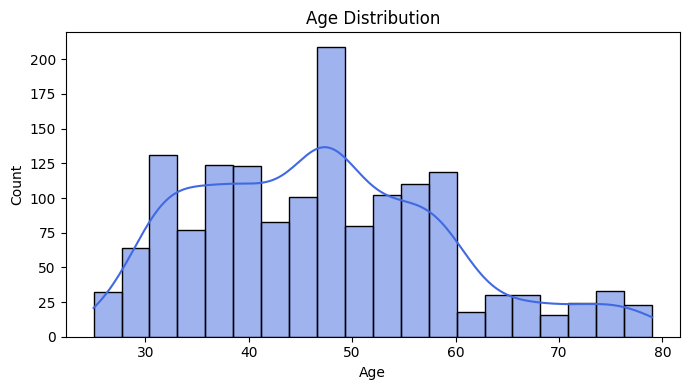

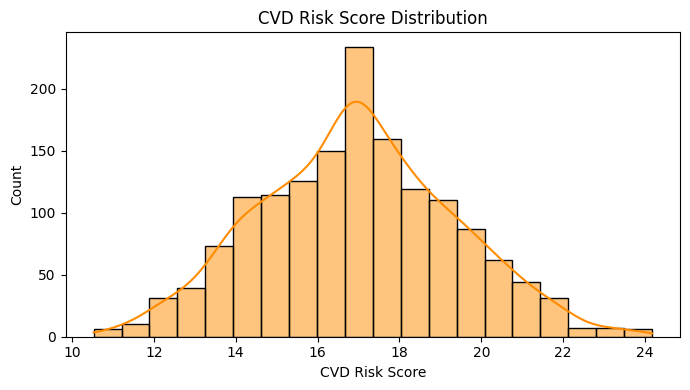

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot - age distribution
plt.figure(figsize=(7,4))
sns.histplot(model_data['Age'], bins=20, kde=True, color='royalblue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.tight_layout()
plt.show()

# Plot - cvd risk score
plt.figure(figsize=(7,4))
sns.histplot(model_data['CVD Risk Score'], bins=20, kde=True, color='darkorange')
plt.xlabel("CVD Risk Score")
plt.ylabel("Count")
plt.title("CVD Risk Score Distribution")
plt.tight_layout()
plt.show()


# LinReg - CVD

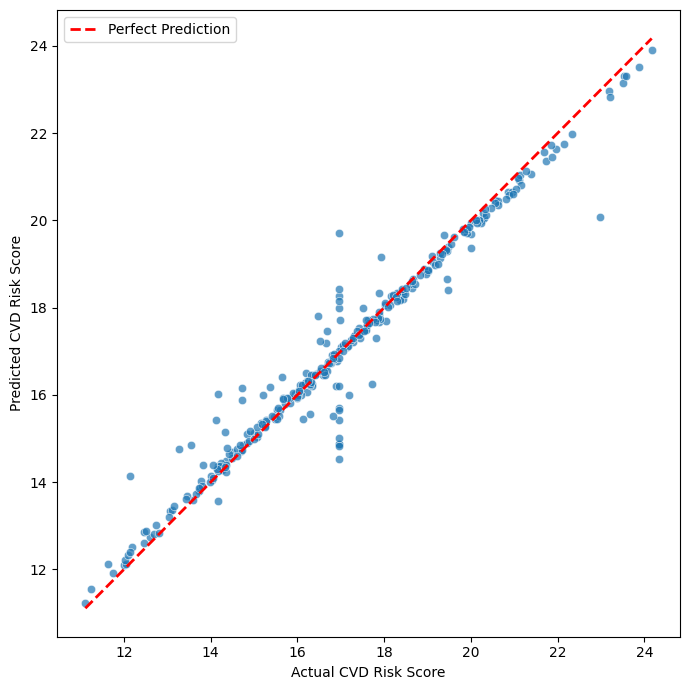

Test R^2: 0.956
Test MAE: 0.30
Test RMSE: 0.55


In [5]:
import sklearn as sk

# Target variable
y = model_data['CVD Risk Score']

# drop target
X = model_data.drop(columns=['CVD Risk Score'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

# prediction
y_pred = reg.predict(X_test)

# evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual CVD Risk Score")
plt.ylabel("Predicted CVD Risk Score")
plt.legend()
plt.tight_layout()
plt.show()

# evaluation
print(f"Test R^2: {r2:.3f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")

# Random Forest - CVD

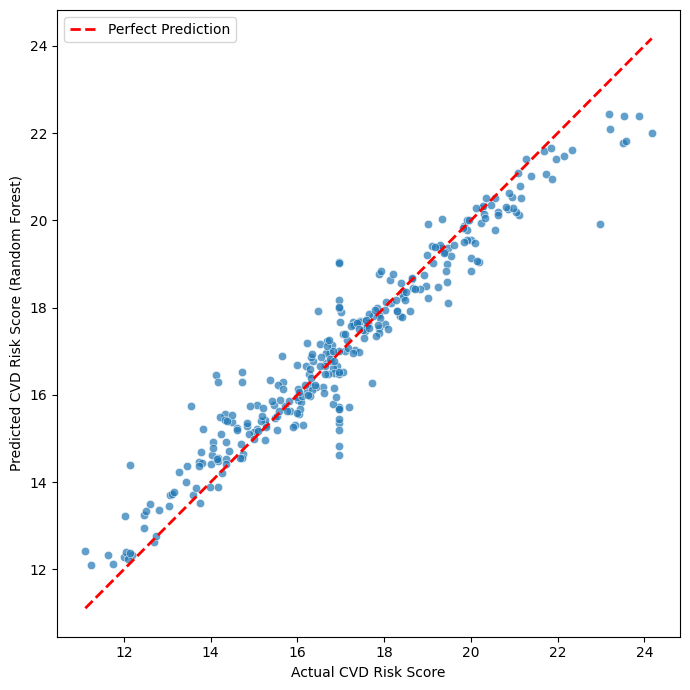

Random Forest – Test R^2:  0.922
Random Forest – Test MAE: 0.52
Random Forest – Test RMSE: 0.73


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# target
y = model_data['CVD Risk Score']

# remove target
X = model_data.drop(columns=['CVD Risk Score'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# random forest regressor
rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train, y_train)

# predictions
y_pred_rf = rf_reg.predict(X_test)


# Plot
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual CVD Risk Score")
plt.ylabel("Predicted CVD Risk Score (Random Forest)")
plt.legend()
plt.tight_layout()
plt.show()

# evaluation
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest – Test R^2:  {r2:.3f}")
print(f"Random Forest – Test MAE: {mae:.2f}")
print(f"Random Forest – Test RMSE: {rmse:.2f}")


# Comparison - CVD

In [7]:
import pandas as pd

cvd_results = {
    "Model": ["Linear Regression", "Random Forest"],
    "R^2": [0.956, 0.922],
    "MAE": [0.30, 0.52],
    "RMSE": [0.55, 0.73]
}

cvd_results_df = pd.DataFrame(cvd_results)

print("Model Evaluation Comparison Table:")
display(cvd_results_df)

Model Evaluation Comparison Table:


,Model,R^2,MAE,RMSE
0,Linear Regression,0.956,0.30,0.55
1,Random Forest,0.922,0.52,0.73


# LinReg - BP Categories

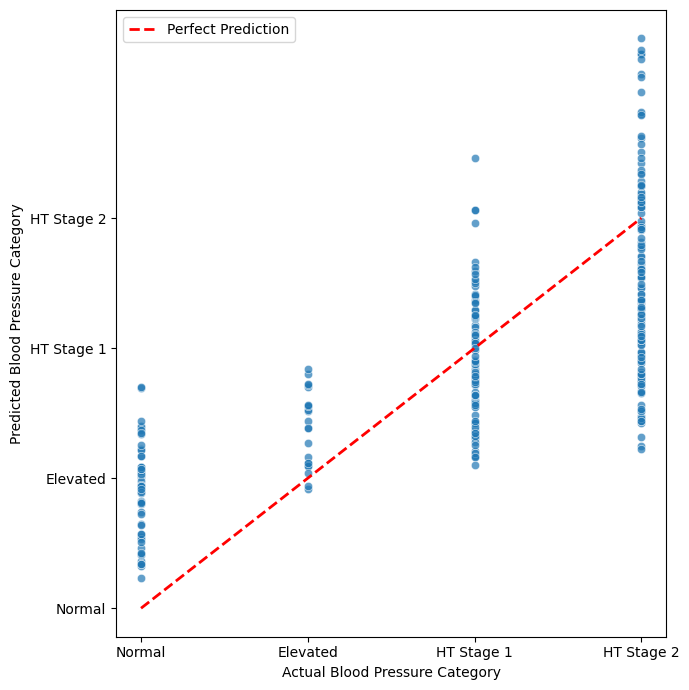

Test R^2: 0.534
Test RMSE: 0.781
| Feature                         |   Coefficient |   Importance |
|:--------------------------------|--------------:|-------------:|
| Height (m)                      |    0.306952   |   0.306952   |
| Diabetes_Status_Encoded         |   -0.200235   |   0.200235   |
| CVD Risk Score                  |    0.0867606  |   0.0867606  |
| Sex                             |    0.0489413  |   0.0489413  |
| Diastolic BP                    |    0.0438054  |   0.0438054  |
| Family_History_CVD_Encoded      |   -0.0377545  |   0.0377545  |
| BMI                             |   -0.0185923  |   0.0185923  |
| Systolic BP                     |    0.0175104  |   0.0175104  |
| CVD_Risk_Level_Encoded          |   -0.0146532  |   0.0146532  |
| Smoking_Status_Encoded          |    0.0052678  |   0.0052678  |
| Physical_Activity_Level_Encoded |   -0.00191524 |   0.00191524 |
| Age                             |    0.00191286 |   0.00191286 |
| Total Cholesterol (mg/dL)  

In [27]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Target variable
y = model_data['BP_Category_Label']

# drop the target variable
X = model_data.drop(columns=['BP_Category_Label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# prediction
y_pred = reg.predict(X_test)

# Plot
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', lw=2, label='Perfect Prediction'
)
plt.xlabel("Actual Blood Pressure Category")
plt.ylabel("Predicted Blood Pressure Category")

category_labels = ["Normal", "Elevated", "HT Stage 1", "HT Stage 2"]
int_ticks = np.arange(0, 4)
plt.xticks(int_ticks, category_labels)
plt.yticks(int_ticks, category_labels)

plt.legend()
plt.tight_layout()
plt.show()

# evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test R^2: {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")

# Feature Importance
coefficients = reg.coef_
features = X_train.columns

fi_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Importance': abs(coefficients)
}).sort_values('Importance', ascending=False)

print(fi_df.to_markdown(index=False))


# Random Forest - BP

Random Forest Test Accuracy: 0.905

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        62
           1       0.79      0.50      0.61        22
           2       0.86      0.92      0.89        90
           3       0.95      0.94      0.94       132

    accuracy                           0.91       306
   macro avg       0.88      0.83      0.84       306
weighted avg       0.90      0.91      0.90       306



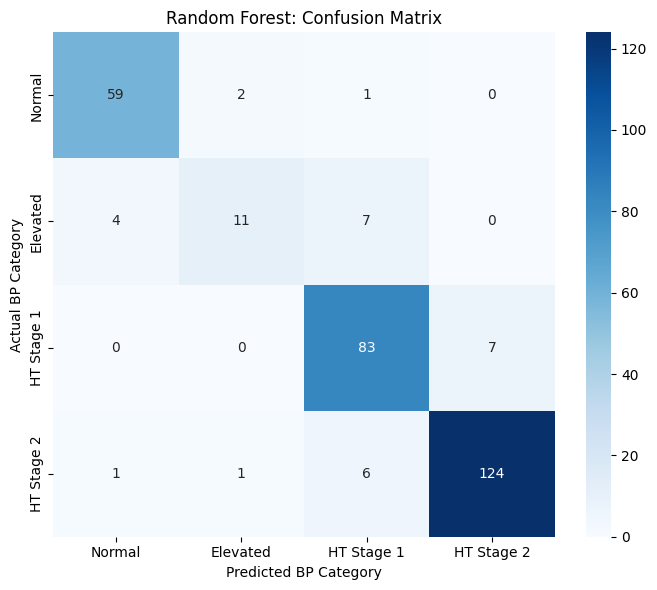

Random Forest – Test R^2:  0.893
Random Forest – Test RMSE: 0.37
| Feature                         |   Importance |
|:--------------------------------|-------------:|
| Diastolic BP                    |   0.341537   |
| Systolic BP                     |   0.248073   |
| CVD Risk Score                  |   0.0615904  |
| BMI                             |   0.0513336  |
| Fasting Blood Sugar (mg/dL)     |   0.0489528  |
| Weight (kg)                     |   0.0486509  |
| Height (m)                      |   0.0467492  |
| Total Cholesterol (mg/dL)       |   0.0465971  |
| Age                             |   0.0448253  |
| Physical_Activity_Level_Encoded |   0.014876   |
| CVD_Risk_Level_Encoded          |   0.0126983  |
| Diabetes_Status_Encoded         |   0.00885204 |
| Smoking_Status_Encoded          |   0.00853311 |
| Sex                             |   0.00845077 |
| Family_History_CVD_Encoded      |   0.00828039 |


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# classification
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

#Plot
plt.figure(figsize=(7,6))
cm = confusion_matrix(y_test, y_pred_rf)
category_labels = ["Normal", "Elevated", "HT Stage 1", "HT Stage 2"]
# added labels
sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='d',
    xticklabels=category_labels,
    yticklabels=category_labels
)
plt.xlabel("Predicted BP Category")
plt.ylabel("Actual BP Category")
plt.title("Random Forest: Confusion Matrix")
plt.tight_layout()
plt.show()


# error
r2 = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest – Test R^2:  {r2:.3f}")
print(f"Random Forest – Test RMSE: {rmse:.2f}")

# Feature Importance
feature_importances = rf.feature_importances_
features = X_train.columns
fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print(fi_df.to_markdown(index=False))

# Linear Regression vs. Random Forest - BP

In [17]:
import pandas as pd

bp_results = {
    "Model": ["Linear Regression", "Random Forest"],
    "R^2": [0.534, 0.893],
    "RMSE": [0.78, 0.37]
}

bp_results_df = pd.DataFrame(bp_results)

print("Model Evaluation Comparison Table:")
display(bp_results_df)


Model Evaluation Comparison Table:


,Model,R^2,RMSE
0,Linear Regression,0.534,0.78
1,Random Forest,0.893,0.37


In [116]:
model_data.head(10)

,Sex,Age,Weight (kg),Height (m),BMI,Total Cholesterol (mg/dL),Fasting Blood Sugar (mg/dL),Systolic BP,Diastolic BP,CVD Risk Score,BP_Category_Label,Smoking_Status_Encoded,Diabetes_Status_Encoded,Physical_Activity_Level_Encoded,Family_History_CVD_Encoded,CVD_Risk_Level_Encoded
0,0,32.0000,69.100000,1.71,23.6,248.0,111.0,125.000000,79.0,17.93,1,0,1,0,0,1
1,0,55.0000,118.700000,1.69,41.6,162.0,135.0,139.000000,70.0,20.51,2,1,1,2,1,2
2,1,47.0255,85.917427,1.83,26.9,103.0,114.0,104.000000,77.0,12.64,0,0,0,2,1,1
3,1,44.0000,108.300000,1.80,33.4,134.0,91.0,140.000000,83.0,16.36,2,0,0,2,1,1
4,0,32.0000,99.500000,1.86,28.8,146.0,141.0,144.000000,83.0,17.88,2,1,1,2,0,1
5,0,58.0000,117.900000,1.87,33.7,156.0,82.0,142.000000,90.0,16.96,3,1,0,1,1,2
6,1,33.0000,117.900000,1.82,35.6,184.0,87.0,96.000000,63.0,17.60,0,0,1,0,0,1
7,1,55.0000,100.100000,1.74,33.1,287.0,96.0,115.000000,73.0,18.11,0,1,0,1,0,2
8,0,37.0000,110.100000,1.86,31.8,177.0,70.0,125.627572,95.0,15.25,3,1,0,2,0,1
9,0,58.0000,97.600000,1.86,28.2,281.0,126.0,133.000000,83.0,17.91,2,0,0,1,0,1


# Systolic BP - LinReg

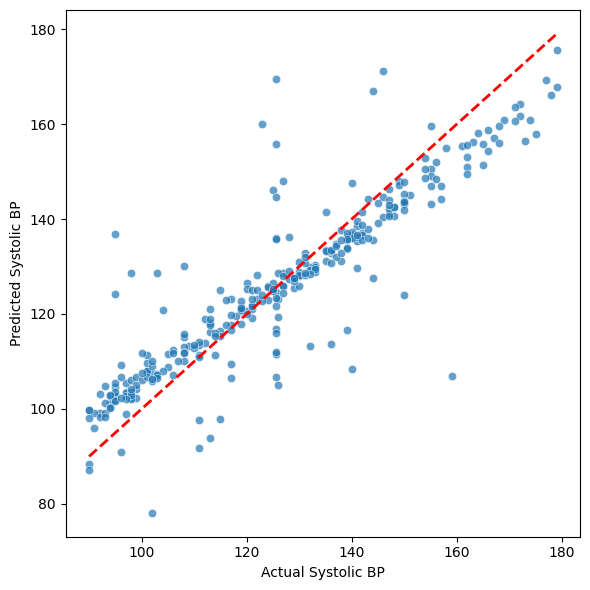

Systolic BP Model:
R^2: 0.799
RMSE: 10.00
Systolic BP Model - Feature Importance:
| Feature                         |   Coefficient |   Importance |
|:--------------------------------|--------------:|-------------:|
| Diabetes_Status_Encoded         |  -28.6542     |  28.6542     |
| CVD Risk Score                  |   14.8128     |  14.8128     |
| BMI                             |   -2.68453    |   2.68453    |
| Height (m)                      |    1.7889     |   1.7889     |
| CVD_Risk_Level_Encoded          |   -1.63232    |   1.63232    |
| Smoking_Status_Encoded          |    1.36345    |   1.36345    |
| Family_History_CVD_Encoded      |    0.829922   |   0.829922   |
| Total Cholesterol (mg/dL)       |   -0.273534   |   0.273534   |
| Sex                             |    0.260549   |   0.260549   |
| Physical_Activity_Level_Encoded |   -0.104777   |   0.104777   |
| Weight (kg)                     |   -0.0506077  |   0.0506077  |
| Age                             |    0.019523

In [25]:
# predictors
X_sys = model_data.drop(columns=['Systolic BP', 'Diastolic BP'])
y_sys = model_data['Systolic BP']

# train-test split
X_train_sys, X_test_sys, y_train_sys, y_test_sys = train_test_split(
    X_sys, y_sys, test_size=0.2, random_state=42
)

# linear regression
reg_sys = LinearRegression()
reg_sys.fit(X_train_sys, y_train_sys)
y_pred_sys = reg_sys.predict(X_test_sys)

# visualization
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_sys, y=y_pred_sys, alpha=0.7)
plt.plot([y_test_sys.min(), y_test_sys.max()], [y_test_sys.min(), y_test_sys.max()], 'r--', lw=2)
plt.xlabel("Actual Systolic BP")
plt.ylabel("Predicted Systolic BP")
plt.tight_layout()
plt.show()

# evaluation
r2_sys = r2_score(y_test_sys, y_pred_sys)
rmse_sys = np.sqrt(mean_squared_error(y_test_sys, y_pred_sys))

print("Systolic BP Model:")
print(f"R^2: {r2_sys:.3f}")
print(f"RMSE: {rmse_sys:.2f}")

# Feature importance
coefficients_sys = reg_sys.coef_
features_sys = X_train_sys.columns
fi_df_sys = pd.DataFrame({
    'Feature': features_sys,
    'Coefficient': coefficients_sys,
    'Importance': abs(coefficients_sys)
}).sort_values('Importance', ascending=False)

# plot
print("Systolic BP Model - Feature Importance:")
print(fi_df_sys.to_markdown(index=False))

# Diastolic BP - LinReg

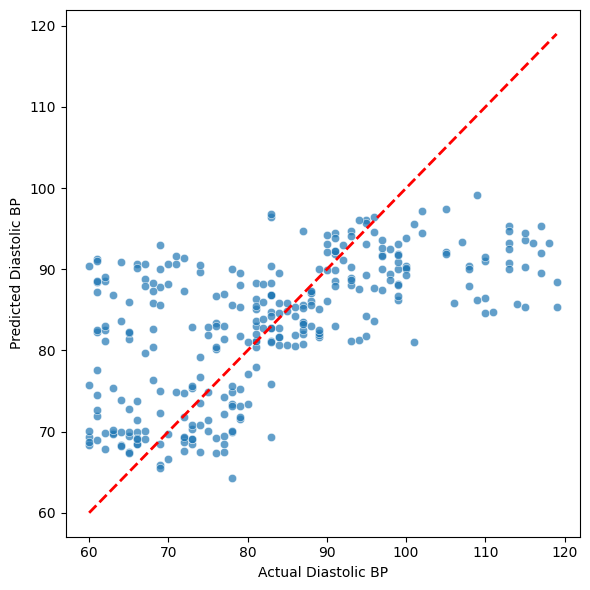

Diastolic BP Model:
R^2: 0.356
RMSE: 12.19

Diastolic BP Model - Feature Importance:
| Feature                         |   Coefficient |   Importance |
|:--------------------------------|--------------:|-------------:|
| BP_Category_Label               |    8.29327    |   8.29327    |
| Diabetes_Status_Encoded         |    5.50003    |   5.50003    |
| CVD Risk Score                  |   -2.50039    |   2.50039    |
| Height (m)                      |   -2.39129    |   2.39129    |
| Sex                             |   -1.05453    |   1.05453    |
| CVD_Risk_Level_Encoded          |   -0.927358   |   0.927358   |
| Family_History_CVD_Encoded      |    0.676231   |   0.676231   |
| BMI                             |    0.609631   |   0.609631   |
| Physical_Activity_Level_Encoded |   -0.563259   |   0.563259   |
| Smoking_Status_Encoded          |   -0.315929   |   0.315929   |
| Total Cholesterol (mg/dL)       |    0.0542544  |   0.0542544  |
| Weight (kg)                     |   -0.036

In [26]:
# Predictors
X_dia = model_data.drop(columns=['Systolic BP', 'Diastolic BP'])
y_dia = model_data['Diastolic BP']

# train-test split
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(
    X_dia, y_dia, test_size=0.2, random_state=42
)

#  linear regression
reg_dia = LinearRegression()
reg_dia.fit(X_train_dia, y_train_dia)
y_pred_dia = reg_dia.predict(X_test_dia)

# visualization
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_dia, y=y_pred_dia, alpha=0.7)
plt.plot([y_test_dia.min(), y_test_dia.max()], [y_test_dia.min(), y_test_dia.max()], 'r--', lw=2)
plt.xlabel("Actual Diastolic BP")
plt.ylabel("Predicted Diastolic BP")
plt.tight_layout()
plt.show()

# evaluation
r2_dia = r2_score(y_test_dia, y_pred_dia)
rmse_dia = np.sqrt(mean_squared_error(y_test_dia, y_pred_dia))

print("Diastolic BP Model:")
print(f"R^2: {r2_dia:.3f}")
print(f"RMSE: {rmse_dia:.2f}")

# Feature importance
coefficients_dia = reg_dia.coef_
features_dia = X_train_dia.columns
fi_df_dia = pd.DataFrame({
    'Feature': features_dia,
    'Coefficient': coefficients_dia,
    'Importance': abs(coefficients_dia)
}).sort_values('Importance', ascending=False)

# Plot
print("\nDiastolic BP Model - Feature Importance:")
print(fi_df_dia.to_markdown(index=False))
